# Cab  Data Analysis

### Importing all libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset :

In [33]:
cab_data = pd.read_csv('Cab_data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_Id.csv')
transaction_id = pd.read_csv('Transaction_Id.csv')

In [34]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [35]:
cab_data.shape

(1998, 7)

In [36]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [37]:
city.shape

(20, 3)

In [38]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [39]:
customer_id['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [40]:
customer_id.shape

(49171, 4)

In [41]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [42]:
transaction_id.shape

(1999, 3)

In [43]:
## merging all data:

merge1 = customer_id.merge(transaction_id, on = "Customer ID")
merge2 = merge1.merge(cab_data, on = "Transaction ID")
merge3 = merge2.merge(city, on = "City")

In [44]:
merge1.shape

(1999, 6)

In [45]:
merge2.shape

(1558, 12)

In [46]:
merge3.shape

(1558, 14)

In [47]:
data = merge3.copy()

In [48]:
data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,28712,Male,53,11242,10000013,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,28020,Male,23,23327,10000014,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,27182,Male,33,8536,10000015,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [49]:
data.rename(columns = {"Gender" : "Customer_gender", "Age" : "Customer_age", "Population":"City_population", "Users":"Users in City"}, inplace = True)

In [50]:
data.head(1)

,Customer ID,Customer_gender,Customer_age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,City_population,Users in City
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"


In [51]:
data.shape

(1558, 14)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1557
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         1558 non-null   int64  
 1   Customer_gender     1558 non-null   object 
 2   Customer_age        1558 non-null   int64  
 3   Income (USD/Month)  1558 non-null   int64  
 4   Transaction ID      1558 non-null   int64  
 5   Payment_Mode        1558 non-null   object 
 6   Date of Travel      1558 non-null   int64  
 7   Company             1558 non-null   object 
 8   City                1558 non-null   object 
 9   KM Travelled        1558 non-null   float64
 10  Price Charged       1558 non-null   float64
 11  Cost of Trip        1558 non-null   float64
 12  City_population     1558 non-null   object 
 13  Users in City       1558 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 182.6+ KB


In [53]:
data.describe()

,Customer ID,Customer_age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1558.000000,1558.000000,1558.000000
mean,19444.908216,34.886393,14872.437099,1.000101e+07,42377.269576,22.637599,478.152125,284.634846
std,20377.418986,12.668717,7953.293530,5.833350e+02,4.412627,12.278440,303.512623,157.573756
min,8.000000,18.000000,2035.000000,1.000001e+07,42371.000000,1.900000,22.200000,19.380000
25%,3975.250000,24.000000,8145.250000,1.000054e+07,42374.000000,12.100000,227.190000,149.870500
50%,7631.500000,32.000000,14635.500000,1.000093e+07,42377.000000,22.400000,440.085000,280.119000
75%,33780.000000,41.000000,20797.250000,1.000148e+07,42380.000000,32.995000,687.887500,417.469000
max,59965.000000,65.000000,34968.000000,1.000201e+07,42388.000000,47.600000,1544.450000,662.688000


In [54]:
## Finding missing values :

data.isnull().sum()
## There is no missing value present.

Customer ID           0
Customer_gender       0
Customer_age          0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
City_population       0
Users in City         0
dtype: int64

In [55]:
## Finding duplicated values :

data.duplicated().sum()

## No duplicated values found.

0

In [56]:
data.head()

,Customer ID,Customer_gender,Customer_age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,City_population,Users in City
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,28712,Male,53,11242,10000013,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,28020,Male,23,23327,10000014,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,27182,Male,33,8536,10000015,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [57]:
## converting the data file into csv:

data.to_excel('All_data.xlsx')

In [58]:
## Loding the excel file:
data = pd.read_excel('All_data.xlsx', index_col = [0])

In [59]:
data.head()

,Customer ID,Customer_gender,Customer_age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,City_population,Users in City
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,28712,Male,53,11242,10000013,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,28020,Male,23,23327,10000014,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,27182,Male,33,8536,10000015,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [65]:
data['month'] = data['Date of Travel'].dt.month_name()
data['Year'] = data['Date of Travel'].dt.year
data['Day'] = data['Date of Travel'].dt.day_name()
data['Week of Travel'] = data['Date of Travel'].dt.week
data['Date'] = data['Date of Travel'].dt.day

data.drop(['Date of Travel'], axis = 1, inplace  = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1552\4128066353.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week of Travel'] = data['Date of Travel'].dt.week


In [66]:
data.head()

,Customer ID,Customer_gender,Customer_age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,City_population,Users in City,month,Year,Day,Week of Travel,Date
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",January,2016,Friday,1,8
1,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",January,2016,Wednesday,1,6
2,28712,Male,53,11242,10000013,Cash,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",January,2016,Saturday,53,2
3,28020,Male,23,23327,10000014,Cash,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",January,2016,Thursday,1,7
4,27182,Male,33,8536,10000015,Card,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",January,2016,Sunday,53,3


## EDA :

In [68]:
data['Customer_gender'].value_counts()

Male    1558
Name: Customer_gender, dtype: int64

In [215]:
data['Cost/km'] = ((data['Cost of Trip']+data['Price Charged'])/2)/data['KM Travelled']

In [217]:
data.head(1)

,Customer ID,Customer_gender,Customer_age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,City_population,Users in City,month,Year,Day,Week of Travel,Date,Cost/km
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",January,2016,Friday,1,8,11.241133


In [253]:
data.to_csv('final_cab_data.csv')

In [218]:
Company_count = data.groupby(['Company'])['Customer ID'].count()
Company_count

Company
Pink Cab       454
Yellow Cab    1104
Name: Customer ID, dtype: int64

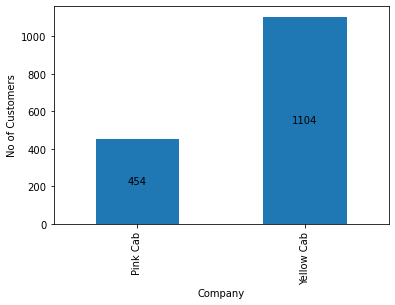

In [219]:
ax = Company_count.plot( kind = 'bar')
ax.set_xlabel("Company")
ax.set_ylabel("No of Customers")
ax.bar_label(ax.containers[0], label_type = "center");

In [220]:
## Most of the record are by the company "YELLOW CAB". Yes, biasness existing in the data

In [221]:
Cities = data['City'].value_counts().head()
Cities

CHICAGO IL        418
NEW YORK NY       253
LOS ANGELES CA    212
WASHINGTON DC     152
BOSTON MA         145
Name: City, dtype: int64

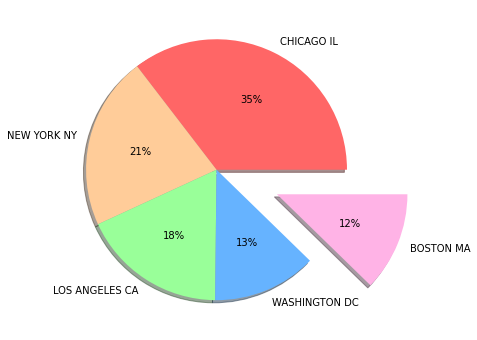

In [222]:
plt.figure(figsize = (12,6))
exp = [0,0,0,0,0.5]
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#ffb3e6']
plt.pie(Cities, labels = Cities.index, autopct='%.0f%%', shadow = True, explode = exp, colors = colors);

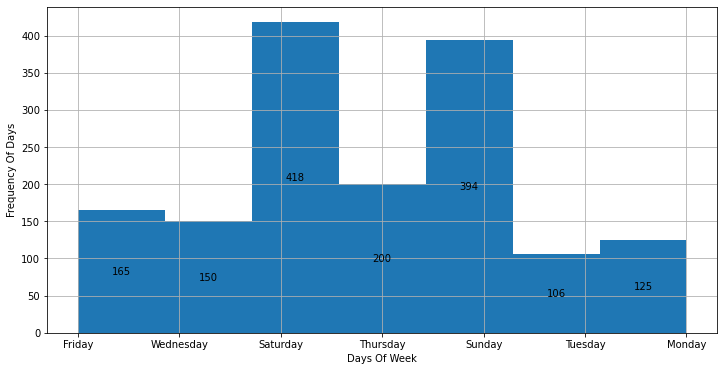

In [223]:
plt.figure(figsize = (12,6))
ax = data['Day'].hist(bins = 7)
ax.set_xlabel("Days Of Week")
ax.set_ylabel("Frequency Of Days")
ax.bar_label(ax.containers[0], label_type = "center");

## Most of the customer travelled in Weekends

In [224]:
## Average age of Customer using Cab :

print(f"Average Age of People using Cabs : {data['Customer_age'].mean()}\n")
print(f"Average Cost of Trip : {data['Cost of Trip'].mean()}\n")
print(f"Averge KM travelled : {data['KM Travelled'].mean()}\n")

Average Age of People using Cabs : 34.88639281129653

Average Cost of Trip : 284.6348459563547

Averge KM travelled : 22.637599486521182



In [225]:
data['Cost of Trip'].mean()

284.6348459563547

In [226]:
data['Payment_Mode'].value_counts()

## Overall Customer use card Payment method rather than Cash

Card    914
Cash    644
Name: Payment_Mode, dtype: int64

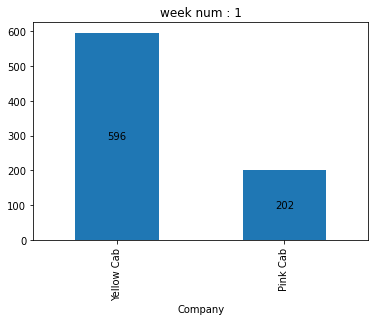

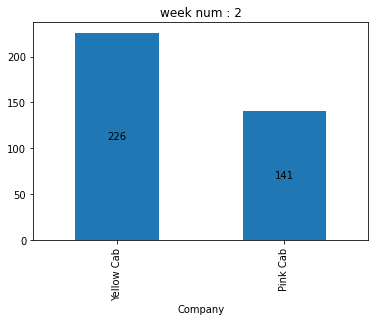

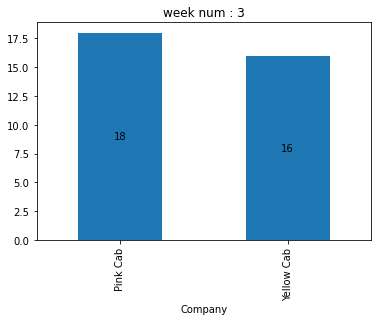

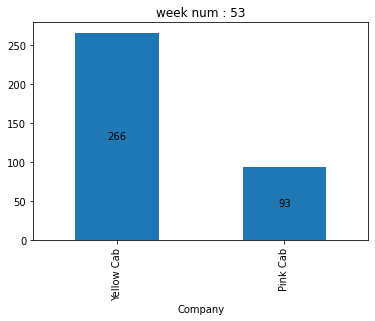

In [227]:
week = data['Week of Travel'].value_counts()
weeknum = (list(week.index.sort_values(ascending = True)))
for i in weeknum:
    plt.figure()
    week = data[data['Week of Travel'] == i]
    ax = week['Company'].value_counts().plot(kind = 'bar')
    ax.set_title(f"week num : {i}")
    ax.set_xlabel("Company")
    ax.bar_label(ax.containers[0], label_type = "center")

In [228]:
pink = data[data['Company'] == "Pink Cab"]
yellow = data[data['Company'] == "Yellow Cab"]

## Pink Cab

In [229]:
pink.head()

,Customer ID,Customer_gender,Customer_age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,City_population,Users in City,month,Year,Day,Week of Travel,Date,Cost/km
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",January,2016,Friday,1,8,11.241133
1,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",January,2016,Wednesday,1,6,12.113452
2,28712,Male,53,11242,10000013,Cash,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",January,2016,Saturday,53,2,12.324779
3,28020,Male,23,23327,10000014,Cash,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",January,2016,Thursday,1,7,10.988875
4,27182,Male,33,8536,10000015,Card,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",January,2016,Sunday,53,3,12.164719


In [230]:
p_city = pink.City.value_counts().head()
p_city

LOS ANGELES CA    104
CHICAGO IL         60
SAN DIEGO CA       58
NEW YORK NY        52
SEATTLE WA         31
Name: City, dtype: int64

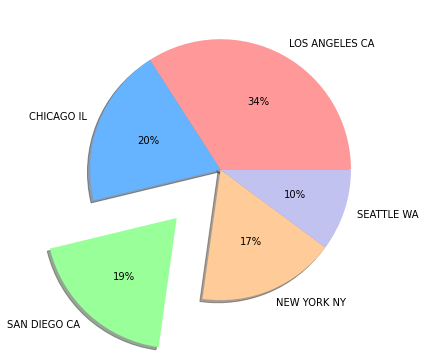

In [231]:
plt.figure(figsize = (12,6))
exp = [0,0,0.5,0,0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(p_city, labels = p_city.index, autopct='%.0f%%', shadow = True, explode = exp, colors = colors);

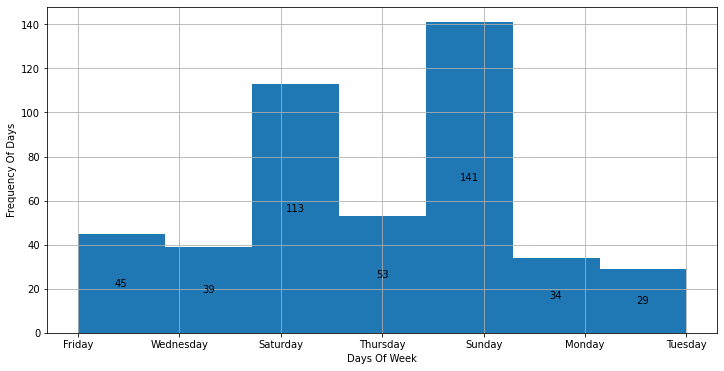

In [232]:
plt.figure(figsize = (12,6))
ax = pink['Day'].hist(bins = 7)
ax.set_xlabel("Days Of Week")
ax.set_ylabel("Frequency Of Days")
ax.bar_label(ax.containers[0], label_type = "center");

In [233]:
## Pink Cab :

print(f"Average Age of People using Cabs : {pink['Customer_age'].mean()}\n")
print(f"Average Cost of Trip : {pink['Cost of Trip'].mean()}\n")
print(f"Averge KM travelled : {pink['KM Travelled'].mean()}\n")

Average Age of People using Cabs : 35.519823788546255

Average Cost of Trip : 246.41940088105733

Averge KM travelled : 22.37022026431719



In [234]:
pink.describe()

,Customer ID,Customer_age,Income (USD/Month),Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year,Week of Travel,Date,Cost/km
count,454.000000,454.000000,454.000000,4.540000e+02,454.000000,454.000000,454.000000,454.0,454.000000,454.000000,454.000000
mean,19606.832599,35.519824,15238.484581,1.000082e+07,22.370220,342.513018,246.419401,2016.0,12.041850,9.385463,13.012813
std,17855.813521,12.730638,8160.371820,6.951875e+02,12.195898,218.762244,135.487597,0.0,20.818368,4.725476,1.861674
min,8.000000,18.000000,2035.000000,1.000001e+07,1.900000,22.200000,19.380000,2016.0,1.000000,2.000000,8.698980
25%,6047.750000,25.000000,8060.500000,1.000012e+07,11.820000,164.530000,127.098000,2016.0,1.000000,6.000000,11.857409
50%,12615.500000,33.000000,15168.500000,1.000038e+07,22.310000,308.150000,244.074000,2016.0,2.000000,9.000000,12.990769
75%,29710.250000,42.000000,21392.000000,1.000149e+07,31.987500,498.057500,350.361000,2016.0,2.000000,13.000000,14.160590
max,59804.000000,65.000000,34936.000000,1.000175e+07,47.600000,1022.590000,542.800000,2016.0,53.000000,19.000000,17.470284


## Yellow cab :

In [235]:
yellow.head()

,Customer ID,Customer_gender,Customer_age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,City_population,Users in City,month,Year,Day,Week of Travel,Date,Cost/km
6,27602,Male,23,8542,10000384,Card,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,"814,885","24,701",January,2016,Saturday,53,2,26.603778
7,27594,Male,28,3901,10000385,Cash,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,"814,885","24,701",January,2016,Saturday,1,9,22.858502
8,27884,Male,32,13505,10000386,Cash,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,"814,885","24,701",January,2016,Sunday,53,3,23.439057
9,28533,Male,39,28386,10000387,Cash,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,"814,885","24,701",January,2016,Wednesday,1,6,21.903551
10,29039,Male,35,17761,10000388,Card,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,"814,885","24,701",January,2016,Thursday,1,7,23.218483


In [236]:
y_city = yellow.City.value_counts().head()
y_city

CHICAGO IL        358
NEW YORK NY       201
WASHINGTON DC     128
BOSTON MA         116
LOS ANGELES CA    108
Name: City, dtype: int64

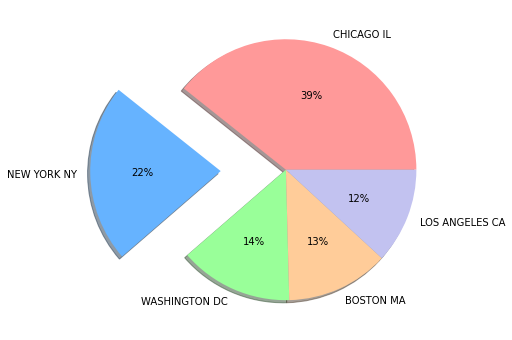

In [237]:
plt.figure(figsize = (12,6))
exp = [0,0.5,0,0,0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(y_city, labels = y_city.index, autopct='%.0f%%', shadow = True, explode = exp, colors = colors);

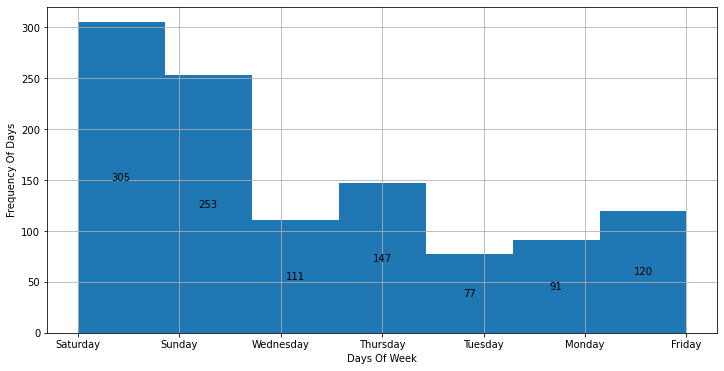

In [238]:
plt.figure(figsize = (12,6))
ax = yellow['Day'].hist(bins = 7)
ax.set_xlabel("Days Of Week")
ax.set_ylabel("Frequency Of Days")
ax.bar_label(ax.containers[0], label_type = "center");

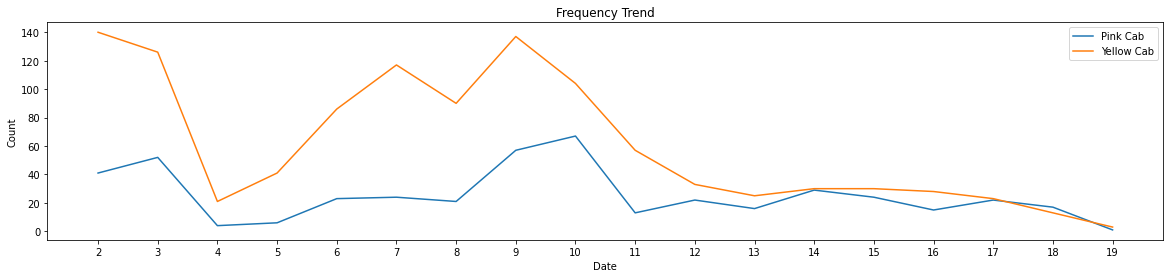

In [240]:
plt.figure(figsize = (20,4))
ax = pink.groupby(['Date'])['Customer ID'].count().plot()
yellow.groupby(['Date'])['Customer ID'].count().plot( ax = ax)
plt.xticks(data['Date'].value_counts().index)
plt.legend(["Pink Cab", "Yellow Cab"])
ax.set_ylabel("Count")
ax.set_title("Frequency Trend");

In [ ]:
## Yellow cab has the most frequency than the Pink cab.

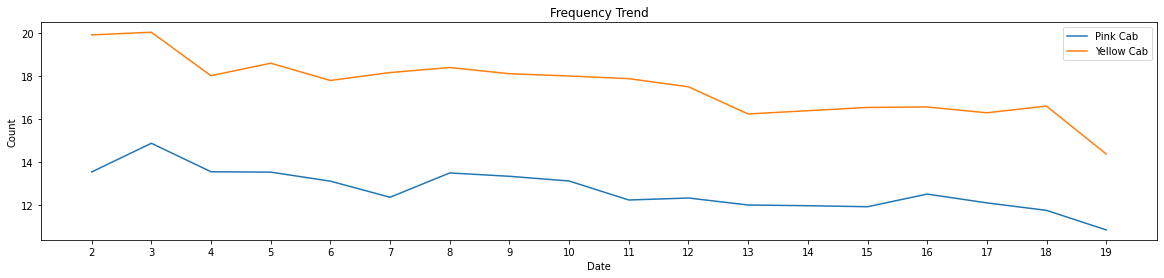

In [241]:
plt.figure(figsize = (20,4))
ax = pink.groupby(['Date'])['Cost/km'].mean().plot()
yellow.groupby(['Date'])['Cost/km'].mean().plot( ax = ax)
plt.xticks(data['Date'].value_counts().index)
plt.legend(["Pink Cab", "Yellow Cab"])
ax.set_ylabel("Count")
ax.set_title("Frequency Trend");

In [ ]:
## Price of Yellow cab is higher than the price pink cab.

## Statistical analysis :

In [245]:
from scipy.stats import shapiro
from scipy import stats

## For whole data :
DataToTest = data['Cost/km']
stat, p = shapiro(DataToTest)

if p > 0.5:
    print("Normal Distribution")
else:
    print('Not a Normal Distribution')

Not a Normal Distribution


In [243]:
## For pink cab
DataToTest = pink['Cost/km']
stat, p = shapiro(DataToTest)

if p > 0.5:
    print("Normal Distribution")
else:
    print('Not a Normal Distribution')

Not a Normal Distribution


In [244]:
## For yellow cab :
DataToTest = yellow['Cost/km']
stat, p = shapiro(DataToTest)

if p > 0.5:
    print("Normal Distribution")
else:
    print('Not a Normal Distribution')

Not a Normal Distribution


In [246]:
## z score test :
p_cost = pink['Cost/km']
y_cost = yellow['Cost/km']

stats.levene(p_cost, y_cost)
# Shapiro-Wilk test for normality
stats.shapiro(p_cost)
stats.shapiro(y_cost)

ShapiroResult(statistic=0.9767647981643677, pvalue=2.6123283224099847e-12)

In [251]:
pvalue = 2.6123283224099847e-12
a = 0.5
if p > a:
    print("Accept the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis
